In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

from utils import decorate
from thinkstats2 import Pmf, Cdf

import thinkstats2
import thinkplot
from datetime import datetime
import time

**Replacing dates with increasing integers to better compare things happening on the certain days**

In [2]:
games = pd.read_csv('games.csv')
gps = pd.read_csv('gps.csv')
rpe = pd.read_csv('rpe.csv')
wellness = pd.read_csv('wellness.csv')

for i, row in rpe.iterrows():
    t = datetime.strptime(row['Date'], '%Y-%m-%d')
    a1 = int(t.strftime('%Y%m%d'))
    rpe.at[i,'Date'] = a1

for i, row in games.iterrows():
    t = datetime.strptime(row['Date'], '%Y-%m-%d')
    a1 = int(t.strftime('%Y%m%d'))
    games.at[i,'Date'] = a1

for i, row in wellness.iterrows():
    t = datetime.strptime(row['Date'], '%Y-%m-%d')
    a1 = int(t.strftime('%Y%m%d'))
    wellness.at[i,'Date'] = a1
    
    #replacing percent strings with float percents
    wellness.at[i,'TrainingReadiness'] = float(row['TrainingReadiness'].strip('%'))

In [3]:
games.replace('W',1,inplace=True)
games.replace('L',0,inplace=True)
games.head()

GameID      Date Tournament  TournamentGame    Team   Opponent  Outcome  \
0       1  20171130      Dubai               1  Canada      Spain        1   
1       2  20171130      Dubai               2  Canada    Ireland        1   
2       3  20171130      Dubai               3  Canada       Fiji        1   
3       4  20171201      Dubai               4  Canada     France        1   
4       5  20171201      Dubai               5  Canada  Australia        0   

   TeamPoints  TeamPointsAllowed  
0          19                  0  
1          31                  0  
2          31                 14  
3          24                 19  
4           7                 25

In [4]:
rpe.head()

Date  PlayerID Training        SessionType  Duration  RPE  SessionLoad  \
0  20180721        13      Yes  Mobility/Recovery       5.0  0.0          0.0   
1  20180721        13      Yes               Game      29.0  7.0        203.0   
2  20180721        13      Yes               Game      27.0  9.0        243.0   
3  20180720        11      Yes               Game      36.0  6.0        216.0   
4  20180720        11      Yes               Game      36.0  8.0        288.0   

   DailyLoad  AcuteLoad  ChronicLoad  AcuteChronicRatio  ObjectiveRating  \
0      446.0      323.1       303.25               1.07              NaN   
1        NaN        NaN          NaN                NaN              NaN   
2        NaN        NaN          NaN                NaN              NaN   
3      534.0      256.3       344.18               0.74              9.0   
4        NaN        NaN          NaN                NaN              9.0   

   FocusRating BestOutOfMyself  
0          NaN      Not at all  
1          NaN      Not at all  
2          NaN      Not at all  
3         10.0      Absolutely  
4         10.0      Absolutely

In [5]:
wellness.Pain.replace('Yes',1,inplace=True)
wellness.Pain.replace('No',0,inplace=True)
wellness.head()

Date  PlayerID  Fatigue  Soreness  Desire  Irritability   BedTime  \
0  20180721         1        3         3       2             3  23:00:00   
1  20180721         2        4         3       4             4  23:00:00   
2  20180721         3        3         3       5             4  22:30:00   
3  20180721         4        2         3       5             4  00:30:00   
4  20180721         5        5         3       4             4  23:45:00   

   WakeTime  SleepHours  SleepQuality  MonitoringScore  Pain Illness  \
0  07:00:00        8.00             2               13     0      No   
1  07:00:00        8.00             4               19     1      No   
2  06:30:00        8.00             4               19     0      No   
3  07:00:00        6.50             1               15     0      No   
4  07:00:00        7.25             4               20     0      No   

  Menstruation  Nutrition NutritionAdjustment USGMeasurement    USG  \
0          Yes  Excellent                 Yes             No    NaN   
1          Yes        NaN                 NaN            Yes  1.010   
2           No        NaN                 NaN            Yes  1.016   
3          Yes  Excellent                 Yes            Yes  1.025   
4           No       Okay                 Yes            Yes  1.022   

  TrainingReadiness  
0                 0  
1                 0  
2               100  
3                95  
4               100

**Standardizing self reported player answers by calculating the z score for each players answers**

In [6]:
def standardize_col(df, col):
    
    player_grouped = df.groupby('PlayerID')
    
    for p_id in list(range(1,18)):
        mean = player_grouped.get_group(p_id)[col].mean()
        std = player_grouped.get_group(p_id)[col].std()
        for i, row in df.iterrows():
            if row['PlayerID'] == p_id:
                df.at[i, col+'_Z'] = (row[col]-mean)/std
            else:
                pass

wellness_cols = ['Fatigue', 'Soreness', 'Irritability', 'Desire', 'SleepQuality', 'TrainingReadiness']

for col in wellness_cols:
    standardize_col(wellness, col)

standardize_col(rpe,'RPE')

In [7]:
rpe.head()

Date  PlayerID Training        SessionType  Duration  RPE  SessionLoad  \
0  20180721        13      Yes  Mobility/Recovery       5.0  0.0          0.0   
1  20180721        13      Yes               Game      29.0  7.0        203.0   
2  20180721        13      Yes               Game      27.0  9.0        243.0   
3  20180720        11      Yes               Game      36.0  6.0        216.0   
4  20180720        11      Yes               Game      36.0  8.0        288.0   

   DailyLoad  AcuteLoad  ChronicLoad  AcuteChronicRatio  ObjectiveRating  \
0      446.0      323.1       303.25               1.07              NaN   
1        NaN        NaN          NaN                NaN              NaN   
2        NaN        NaN          NaN                NaN              NaN   
3      534.0      256.3       344.18               0.74              9.0   
4        NaN        NaN          NaN                NaN              9.0   

   FocusRating BestOutOfMyself     RPE_Z  
0          NaN      Not at all -1.253472  
1          NaN      Not at all  1.153176  
2          NaN      Not at all  1.840789  
3         10.0      Absolutely  0.750374  
4         10.0      Absolutely  1.695403

In [8]:
wellness.head()

Date  PlayerID  Fatigue  Soreness  Desire  Irritability   BedTime  \
0  20180721         1        3         3       2             3  23:00:00   
1  20180721         2        4         3       4             4  23:00:00   
2  20180721         3        3         3       5             4  22:30:00   
3  20180721         4        2         3       5             4  00:30:00   
4  20180721         5        5         3       4             4  23:45:00   

   WakeTime  SleepHours  SleepQuality  ...  NutritionAdjustment  \
0  07:00:00        8.00             2  ...                  Yes   
1  07:00:00        8.00             4  ...                  NaN   
2  06:30:00        8.00             4  ...                  NaN   
3  07:00:00        6.50             1  ...                  Yes   
4  07:00:00        7.25             4  ...                  Yes   

   USGMeasurement    USG TrainingReadiness Fatigue_Z Soreness_Z  \
0              No    NaN                 0  0.318219  -0.304322   
1             Yes  1.010                 0  0.207884  -0.230312   
2             Yes  1.016               100 -0.578512  -0.279482   
3             Yes  1.025                95 -1.591780  -0.605094   
4             Yes  1.022               100  1.808898  -0.983282   

  Irritability_Z  Desire_Z SleepQuality_Z  TrainingReadiness_Z  
0      -0.987002 -0.415362      -1.551148            -0.562599  
1      -0.186841 -0.121453      -0.100390            -0.410237  
2       0.143069  2.144929       0.255789             0.558418  
3       0.463336  1.575278      -1.447874             0.621488  
4       0.054038 -0.403411       0.286967             0.891845  

[5 rows x 25 columns]

This exploration was using multiple regression to see if the players self reported wellness scores on game days could be used to predict whether they would win, how many points they would score, and how many points they gave up. To do this we calculated the mean wellness scores on game day dates and added them to the game dataframe in order to use the statsmodels module to run multiple regression. The cell below adds these values to the game dataframe.

In [9]:
date_grouped = wellness.groupby('Date')
mean_fat = date_grouped['Fatigue_Z'].mean()
mean_sore = date_grouped['Soreness_Z'].mean()
mean_des = date_grouped['Desire_Z'].mean()
mean_irr = date_grouped['Irritability_Z'].mean()
mean_sleepq = date_grouped['SleepQuality_Z'].mean()
mean_sleept = date_grouped['SleepHours'].mean()
mean_readiness = date_grouped['TrainingReadiness_Z'].mean()

for i, row in games.iterrows():
    games.at[i, 'Fat'] = mean_fat[row['Date']]
    games.at[i, 'Sore'] = mean_sore[row['Date']]
    games.at[i, 'Des'] = mean_des[row['Date']]
    games.at[i, 'Irr'] = mean_irr[row['Date']]
    games.at[i, 'SleepQ'] = mean_sleepq[row['Date']]
    games.at[i, 'SleepT'] = mean_sleept[row['Date']]
    games.at[i, 'Readiness'] = mean_readiness[row['Date']]
    
games.head()

GameID      Date Tournament  TournamentGame    Team   Opponent  Outcome  \
0       1  20171130      Dubai               1  Canada      Spain        1   
1       2  20171130      Dubai               2  Canada    Ireland        1   
2       3  20171130      Dubai               3  Canada       Fiji        1   
3       4  20171201      Dubai               4  Canada     France        1   
4       5  20171201      Dubai               5  Canada  Australia        0   

   TeamPoints  TeamPointsAllowed       Fat      Sore       Des       Irr  \
0          19                  0  0.494438  0.974050  1.672751  0.383781   
1          31                  0  0.494438  0.974050  1.672751  0.383781   
2          31                 14  0.494438  0.974050  1.672751  0.383781   
3          24                 19 -0.352514 -1.085568  1.077209  0.132107   
4           7                 25 -0.352514 -1.085568  1.077209  0.132107   

     SleepQ    SleepT  Readiness  
0  0.079810  8.203125   0.619255  
1  0.079810  8.203125   0.619255  
2  0.079810  8.203125   0.619255  
3 -0.475545  7.171875   0.524882  
4 -0.475545  7.171875   0.524882

We started by making a preliminary correlation matrix to see if anything jumped out as a good predictor of game outcome or point totals.

In [10]:
columns = ['Outcome', 'TeamPoints', 'TeamPointsAllowed', 'Fat', 'Sore', 'Des', 'Irr', 'SleepQ', 'SleepT',
           'Sum_Z']
games['Sum_Z'] = games['Fat']+games['Sore']+games['Des']+games['Irr']+games['SleepQ']+games['Readiness']
games[columns].corr()

Outcome  TeamPoints  TeamPointsAllowed       Fat  \
Outcome            1.000000    0.740171          -0.751528  0.188176   
TeamPoints         0.740171    1.000000          -0.483780  0.185534   
TeamPointsAllowed -0.751528   -0.483780           1.000000 -0.308816   
Fat                0.188176    0.185534          -0.308816  1.000000   
Sore               0.216107    0.220732          -0.304649  0.884424   
Des                0.153654    0.120468          -0.216315  0.535827   
Irr                0.042370    0.100627          -0.129036  0.595916   
SleepQ             0.081989    0.006960          -0.187217  0.854533   
SleepT             0.125938    0.182159          -0.078184  0.554684   
Sum_Z              0.177702    0.147918          -0.287469  0.909093   

                       Sore       Des       Irr    SleepQ    SleepT     Sum_Z  
Outcome            0.216107  0.153654  0.042370  0.081989  0.125938  0.177702  
TeamPoints         0.220732  0.120468  0.100627  0.006960  0.182159  0.147918  
TeamPointsAllowed -0.304649 -0.216315 -0.129036 -0.187217 -0.078184 -0.287469  
Fat                0.884424  0.535827  0.595916  0.854533  0.554684  0.909093  
Sore               1.000000  0.594816  0.446359  0.734270  0.629811  0.911977  
Des                0.594816  1.000000  0.752196  0.695644 -0.025541  0.800593  
Irr                0.446359  0.752196  1.000000  0.817361  0.137786  0.733905  
SleepQ             0.734270  0.695644  0.817361  1.000000  0.387897  0.915718  
SleepT             0.629811 -0.025541  0.137786  0.387897  1.000000  0.458045  
Sum_Z              0.911977  0.800593  0.733905  0.915718  0.458045  1.000000

These wellness scored don't seem to be a particularly good predictor of winning or losing, as there is a pretty low r^2 value.

In [11]:
import statsmodels.formula.api as smf

outcome_model = smf.logit('Outcome ~ Fat + Sore + Des + Irr + SleepQ + SleepT + Readiness', data=games)
outcome_res = outcome_model.fit()
outcome_res.summary()

Optimization terminated successfully.
         Current function value: 0.616572
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                   38
Model:                          Logit   Df Residuals:                       30
Method:                           MLE   Df Model:                            7
Date:                Wed, 10 Apr 2019   Pseudo R-squ.:                 0.08087
Time:                        19:26:49   Log-Likelihood:                -23.430
converged:                       True   LL-Null:                       -25.491
                                        LLR p-value:                    0.7655
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.4819     13.894     -0.898      0.369     -39.713      14.749
Fat            2.3093      2.565      0.900      0.368      -2.718       7.337
Sore          -1.0263      1.813     -0.566      0.571      -4.581       2.528
Des            3.6516      3.255      1.122      0.262      -2.728      10.032
Irr           -3.1695      5.056     -0.627      0.531     -13.079       6.740
SleepQ        -2.1108      3.189     -0.662      0.508      -8.360       4.139
SleepT         1.1104      1.432      0.776      0.438      -1.696       3.916
Readiness     -1.3527      2.819     -0.480      0.631      -6.877       4.171
==============================================================================
"""

This is the best multiple regression model we found so far, using the wellness scores to try to predict the points that the team scored in a game. The r^2 value is still pretty low, but its at least better.

In [12]:
offense_model = smf.ols('TeamPoints ~ Fat + Sore + Des + Irr + SleepQ + SleepT + Readiness', data=games)
offense_res = offense_model.fit()
offense_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TeamPoints   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     1.597
Date:                Wed, 10 Apr 2019   Prob (F-statistic):              0.175
Time:                        19:26:49   Log-Likelihood:                -136.94
No. Observations:                  38   AIC:                             289.9
Df Residuals:                      30   BIC:                             303.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -48.6181     64.772     -0.751      0.459    -180.900      83.664
Fat           10.9513     11.650      0.940      0.355     -12.841      34.743
Sore          -0.3869      8.225     -0.047      0.963     -17.185      16.412
Des           12.6822     14.253      0.890      0.381     -16.427      41.791
Irr           16.6055     21.719      0.765      0.450     -27.750      60.961
SleepQ       -31.1177     14.480     -2.149      0.040     -60.691      -1.545
SleepT         5.8181      6.759      0.861      0.396      -7.985      19.621
Readiness    -13.3669     12.958     -1.032      0.311     -39.831      13.097
==============================================================================
Omnibus:                        1.149   Durbin-Watson:                   2.362
Prob(Omnibus):                  0.563   Jarque-Bera (JB):                0.922
Skew:                           0.074   Prob(JB):                        0.631
Kurtosis:                       2.252   Cond. No.                         352.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Looking at points allowed, still pretty low predictive quality.

In [13]:
defense_model = smf.ols('TeamPointsAllowed ~ Fat + Sore + Des + Irr + SleepQ + SleepT + Readiness', data=games)
defense_res = defense_model.fit()
defense_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      TeamPointsAllowed   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                 -0.030
Method:                 Least Squares   F-statistic:                    0.8461
Date:                Wed, 10 Apr 2019   Prob (F-statistic):              0.559
Time:                        19:26:50   Log-Likelihood:                -133.22
No. Observations:                  38   AIC:                             282.4
Df Residuals:                      30   BIC:                             295.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.7724     58.733     -0.217      0.829    -132.722     107.177
Fat          -11.9329     10.564     -1.130      0.268     -33.507       9.641
Sore          -3.1246      7.459     -0.419      0.678     -18.357      12.108
Des            2.2362     12.924      0.173      0.864     -24.159      28.631
Irr           -7.0840     19.694     -0.360      0.722     -47.304      33.136
SleepQ        14.5318     13.130      1.107      0.277     -12.284      41.348
SleepT         4.4085      6.129      0.719      0.478      -8.108      16.925
Readiness     -7.3942     11.750     -0.629      0.534     -31.391      16.603
==============================================================================
Omnibus:                        1.947   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.378   Jarque-Bera (JB):                1.243
Skew:                          -0.130   Prob(JB):                        0.537
Kurtosis:                       2.153   Cond. No.                         352.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**The next exploration we did was using the RPE (rate of percieved exertion values reported for training sessions) values of each day to predict wellness scores for the next day. In order to do this our first step was to add the wellness z scores of the next day to the rpe dataframe.**

In [14]:
rpe.head()

Date  PlayerID Training        SessionType  Duration  RPE  SessionLoad  \
0  20180721        13      Yes  Mobility/Recovery       5.0  0.0          0.0   
1  20180721        13      Yes               Game      29.0  7.0        203.0   
2  20180721        13      Yes               Game      27.0  9.0        243.0   
3  20180720        11      Yes               Game      36.0  6.0        216.0   
4  20180720        11      Yes               Game      36.0  8.0        288.0   

   DailyLoad  AcuteLoad  ChronicLoad  AcuteChronicRatio  ObjectiveRating  \
0      446.0      323.1       303.25               1.07              NaN   
1        NaN        NaN          NaN                NaN              NaN   
2        NaN        NaN          NaN                NaN              NaN   
3      534.0      256.3       344.18               0.74              9.0   
4        NaN        NaN          NaN                NaN              9.0   

   FocusRating BestOutOfMyself     RPE_Z  
0          NaN      Not at all -1.253472  
1          NaN      Not at all  1.153176  
2          NaN      Not at all  1.840789  
3         10.0      Absolutely  0.750374  
4         10.0      Absolutely  1.695403

In [15]:
wellness.head()

Date  PlayerID  Fatigue  Soreness  Desire  Irritability   BedTime  \
0  20180721         1        3         3       2             3  23:00:00   
1  20180721         2        4         3       4             4  23:00:00   
2  20180721         3        3         3       5             4  22:30:00   
3  20180721         4        2         3       5             4  00:30:00   
4  20180721         5        5         3       4             4  23:45:00   

   WakeTime  SleepHours  SleepQuality  ...  NutritionAdjustment  \
0  07:00:00        8.00             2  ...                  Yes   
1  07:00:00        8.00             4  ...                  NaN   
2  06:30:00        8.00             4  ...                  NaN   
3  07:00:00        6.50             1  ...                  Yes   
4  07:00:00        7.25             4  ...                  Yes   

   USGMeasurement    USG TrainingReadiness Fatigue_Z Soreness_Z  \
0              No    NaN                 0  0.318219  -0.304322   
1             Yes  1.010                 0  0.207884  -0.230312   
2             Yes  1.016               100 -0.578512  -0.279482   
3             Yes  1.025                95 -1.591780  -0.605094   
4             Yes  1.022               100  1.808898  -0.983282   

  Irritability_Z  Desire_Z SleepQuality_Z  TrainingReadiness_Z  
0      -0.987002 -0.415362      -1.551148            -0.562599  
1      -0.186841 -0.121453      -0.100390            -0.410237  
2       0.143069  2.144929       0.255789             0.558418  
3       0.463336  1.575278      -1.447874             0.621488  
4       0.054038 -0.403411       0.286967             0.891845  

[5 rows x 25 columns]

putting wellness avg data in the rpe dataframe, where the wellness data is from the day after the rpe data

These next 2 cells take the rpe dataframe and add the wellness z scores from the following day to it so that we can run statsmodels regression on it.

In [16]:
def next_day(rpe_df, wellness_df, rpe_row):
    
    rpe_date = rpe_row['Date']
    next_date = wellness_df[wellness_df['Date'] > rpe_date].min()
    
    return next_date['Date']

In [17]:
well_dates = wellness.groupby('Date')
columns = ['Fatigue_Z', 'Soreness_Z', 'Desire_Z', 'Irritability_Z',
           'SleepQuality_Z', 'Pain']

for i, row in rpe.iterrows():
    if row['Date'] < rpe['Date'].max():
        well_date = next_day(rpe, wellness, row)
        well_rows = well_dates.get_group(well_date)
        for i2, row2 in well_rows.iterrows():
            pid = row2['PlayerID']
            if row['PlayerID'] == pid:
                for col in columns:
                    rpe.at[i, col] = row2[col]

rpe.head()

Date  PlayerID Training        SessionType  Duration  RPE  SessionLoad  \
0  20180721        13      Yes  Mobility/Recovery       5.0  0.0          0.0   
1  20180721        13      Yes               Game      29.0  7.0        203.0   
2  20180721        13      Yes               Game      27.0  9.0        243.0   
3  20180720        11      Yes               Game      36.0  6.0        216.0   
4  20180720        11      Yes               Game      36.0  8.0        288.0   

   DailyLoad  AcuteLoad  ChronicLoad  ...  ObjectiveRating  FocusRating  \
0      446.0      323.1       303.25  ...              NaN          NaN   
1        NaN        NaN          NaN  ...              NaN          NaN   
2        NaN        NaN          NaN  ...              NaN          NaN   
3      534.0      256.3       344.18  ...              9.0         10.0   
4        NaN        NaN          NaN  ...              9.0         10.0   

   BestOutOfMyself     RPE_Z  Fatigue_Z  Soreness_Z  Desire_Z  Irritability_Z  \
0       Not at all -1.253472        NaN         NaN       NaN             NaN   
1       Not at all  1.153176        NaN         NaN       NaN             NaN   
2       Not at all  1.840789        NaN         NaN       NaN             NaN   
3       Absolutely  0.750374   1.671003    0.426559  2.815371        0.652563   
4       Absolutely  1.695403   1.671003    0.426559  2.815371        0.652563   

   SleepQuality_Z  Pain  
0             NaN   NaN  
1             NaN   NaN  
2             NaN   NaN  
3       -0.230249   0.0  
4       -0.230249   0.0  

[5 rows x 21 columns]

In [18]:
rpe.head(20)

Date  PlayerID Training        SessionType  Duration  RPE  \
0   20180721        13      Yes  Mobility/Recovery       5.0  0.0   
1   20180721        13      Yes               Game      29.0  7.0   
2   20180721        13      Yes               Game      27.0  9.0   
3   20180720        11      Yes               Game      36.0  6.0   
4   20180720        11      Yes               Game      36.0  8.0   
5   20180720        11      Yes  Mobility/Recovery      15.0  2.0   
6   20180720        13      Yes               Game      27.0  6.0   
7   20180720        13      Yes               Game      24.0  6.0   
8   20180720        13      Yes  Mobility/Recovery      10.0  0.0   
9   20180719         1      Yes             Skills      60.0  3.0   
10  20180719         2      Yes             Skills      60.0  4.0   
11  20180719         6      Yes       Conditioning      20.0  9.0   
12  20180719         6      Yes           Strength      30.0  4.0   
13  20180719         6      Yes             Combat      20.0  4.0   
14  20180719         7      Yes             Skills      60.0  5.0   
15  20180719        10      Yes             Skills      75.0  4.0   
16  20180719        11      Yes             Skills      90.0  5.0   
17  20180719        13      Yes             Skills      90.0  6.0   
18  20180719        13      Yes  Mobility/Recovery      30.0  0.0   
19  20180719        16      Yes             Skills      60.0  4.0   

    SessionLoad  DailyLoad  AcuteLoad  ChronicLoad  ...  ObjectiveRating  \
0           0.0      446.0      323.1       303.25  ...              NaN   
1         203.0        NaN        NaN          NaN  ...              NaN   
2         243.0        NaN        NaN          NaN  ...              NaN   
3         216.0      534.0      256.3       344.18  ...              9.0   
4         288.0        NaN        NaN          NaN  ...              9.0   
5          30.0        NaN        NaN          NaN  ...              9.0   
6         162.0      306.0      259.4       287.32  ...              NaN   
7         144.0        NaN        NaN          NaN  ...              NaN   
8           0.0        NaN        NaN          NaN  ...              NaN   
9         180.0      180.0       87.9       140.54  ...              NaN   
10        240.0      240.0      117.1       279.96  ...              NaN   
11        180.0      380.0      107.1       301.54  ...              8.0   
12        120.0        NaN        NaN          NaN  ...              8.0   
13         80.0        NaN        NaN          NaN  ...              8.0   
14        300.0      300.0      141.4       342.32  ...              NaN   
15        300.0      300.0      122.1       250.00  ...              NaN   
16        450.0      450.0      180.0       325.11  ...              9.0   
17        540.0      540.0      215.7       276.39  ...              NaN   
18          0.0        NaN        NaN          NaN  ...              NaN   
19        240.0      240.0      102.9       348.57  ...              7.0   

    FocusRating  BestOutOfMyself     RPE_Z  Fatigue_Z  Soreness_Z  Desire_Z  \
0           NaN       Not at all -1.253472        NaN         NaN       NaN   
1           NaN       Not at all  1.153176        NaN         NaN       NaN   
2           NaN       Not at all  1.840789        NaN         NaN       NaN   
3          10.0       Absolutely  0.750374   1.671003    0.426559  2.815371   
4          10.0       Absolutely  1.695403   1.671003    0.426559  2.815371   
5          10.0       Absolutely -1.139683   1.671003    0.426559  2.815371   
6           NaN       Not at all  0.809369   0.802189    0.110634  2.273088   
7           NaN       Not at all  0.809369   0.802189    0.110634  2.273088   
8           NaN       Not at all -1.253472   0.802189    0.110634  2.273088   
9           NaN              NaN -0.254554   0.318219    0.700575  0.450886   
10          NaN              NaN -0.132440   0.207884    0.600282  0.991322   
11          8

In [19]:
wellness.head(20)

Date  PlayerID  Fatigue  Soreness  Desire  Irritability   BedTime  \
0   20180721         1        3         3       2             3  23:00:00   
1   20180721         2        4         3       4             4  23:00:00   
2   20180721         3        3         3       5             4  22:30:00   
3   20180721         4        2         3       5             4  00:30:00   
4   20180721         5        5         3       4             4  23:45:00   
5   20180721         7        2         2       5             4  22:00:00   
6   20180721        10        2         2       4             4  22:30:00   
7   20180721        11        4         3       6             4  23:00:00   
8   20180721        13        4         3       5             4  23:15:00   
9   20180721        14        3         3       4             4  22:15:00   
10  20180721        15        4         3       6             5  22:30:00   
11  20180721        16        3         2       5             3  23:00:00   
12  20180720         1        3         4       3             4  23:00:00   
13  20180720         2        4         4       5             4  22:00:00   
14  20180720         3        4         4       6             4  22:30:00   
15  20180720         4        4         5       6             4  23:00:00   
16  20180720         5        5         6       6             5  23:45:00   
17  20180720         7        3         4       4             4  22:00:00   
18  20180720        10        3         4       4             4  22:30:00   
19  20180720        11        4         4       6             4  23:00:00   

    WakeTime  SleepHours  SleepQuality  ...  NutritionAdjustment  \
0   07:00:00        8.00             2  ...                  Yes   
1   07:00:00        8.00             4  ...                  NaN   
2   06:30:00        8.00             4  ...                  NaN   
3   07:00:00        6.50             1  ...                  Yes   
4   07:00:00        7.25             4  ...                  Yes   
5   07:00:00        9.00             3  ...                  Yes   
6   05:45:00        7.25             3  ...                  Yes   
7   07:00:00        8.00             3  ...                  Yes   
8   07:15:00        8.00             4  ...                  Yes   
9   07:00:00        8.75             4  ...                  Yes   
10  07:00:00        8.50             7  ...                  Yes   
11  07:00:00        8.00             2  ...                  Yes   
12  07:00:00        8.00             2  ...                  Yes   
13  07:00:00        9.00             3  ...                  NaN   
14  06:30:00        8.00             4  ...                  NaN   
15  07:00:00        8.00             3  ...                  Yes   
16  07:00:00        7.25             5  ...                  Yes   
17  07:00:00        9.00             4  ...                  Yes   
18  07:00:00        8.50             3  ...                  Yes   
19  07:15:00        8.25             4  ...                  Yes   

    USGMeasurement    USG TrainingReadiness Fatigue_Z Soreness_Z  \
0               No    NaN                 0  0.318219  -0.304322   
1              Yes  1.010                 0  0.207884  -0.230312   
2              Yes  1.016               100 -0.578512  -0.279482   
3              Yes  1.025                95 -1.591780  -0.605094   
4              Yes  1.022               100  1.808898  -0.983282   
5              Yes  1.014                95 -1.544021  -1.613439   
6              Yes  1.017                70 -1.082603  -1.072057   
7              Yes  1.013               100  1.671003   0.426559   
8              Yes  1.025               100  0.802189   0.110634   
9              Yes  1.015               100 -0.542820  -0.274707   
10              No    NaN                95 -0.484041  -1.073692   
11             Yes  1.140               100  0.401046  -1.022843   
12             Yes  1.019                 0  0.318219   0.700575   
13       

Initial correlation matrix. Soreness is the most correlated with RPE, but still not very high.

In [20]:
columns = ['RPE_Z', 'Fatigue_Z', 'Soreness_Z', 'Desire_Z', 'Irritability_Z',
           'SleepQuality_Z']
rpe[columns].corr()

RPE_Z  Fatigue_Z  Soreness_Z  Desire_Z  Irritability_Z  \
RPE_Z           1.000000  -0.088729   -0.214393 -0.059556       -0.015304   
Fatigue_Z      -0.088729   1.000000    0.442297  0.446630        0.300802   
Soreness_Z     -0.214393   0.442297    1.000000  0.348918        0.179070   
Desire_Z       -0.059556   0.446630    0.348918  1.000000        0.360820   
Irritability_Z -0.015304   0.300802    0.179070  0.360820        1.000000   
SleepQuality_Z -0.008024   0.383698    0.152310  0.218769        0.261351   

                SleepQuality_Z  
RPE_Z                -0.008024  
Fatigue_Z             0.383698  
Soreness_Z            0.152310  
Desire_Z              0.218769  
Irritability_Z        0.261351  
SleepQuality_Z        1.000000

**Does type of workout and RPE tell you anything about wellness scores the next day**

In [21]:
session_grouped = rpe.groupby('SessionType')
dependent_cols = ['Fatigue_Z', 'Soreness_Z', 'Desire_Z', 'Irritability_Z', 'SleepQuality_Z', 'Pain']
session_dict = dict()

for name, group in session_grouped:
    df = session_grouped.get_group(name)
    for col in dependent_cols:
        if col != 'Pain':
            model = smf.ols(col + ' ~ RPE_Z', data=df)
            res = model.fit()
            if res.rsquared > .1 or res.pvalues[1] < .05:
                session_dict[name + '_' + col] = (model, res)
        else:
            model = smf.logit(col + ' ~ RPE_Z', data=df)
            res = model.fit()
            if res.prsquared > .1 or res.pvalues[1] < .05:
                session_dict[name + '_' + col] = (model, res)

for key, val in session_dict.items():
    if key[-4:] != 'Pain':
        print(key + '\n' + str(val[1].rsquared) + '\n' + str(val[1].pvalues) +
              '\n' + str(val[1].params) + '\n----\n')
    else:
        print(key + '\n' + str(val[1].prsquared) + '\n' + str(val[1].pvalues) +
              '\n' + str(val[1].params) + '\n----\n')

Optimization terminated successfully.
         Current function value: 0.270051
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.324259
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.528649
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.337083
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.363212
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.347778
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.360421
         Iterations 6
Conditioning_Fatigue_Z
0.009279008825074264
Intercept    0.491961
RPE_Z        0.004064
dtype: float64
Intercept    0.031508
RPE_Z       -0.098599
dtype: float64
----

Conditioning_Soreness_Z
0.04934557067727674
Intercept    1.230464e-07
RPE_Z        2.170513e-11
dtype: float64
Interce

**Same as above, but trying to combine RPE and duration somehow**

In [22]:
def standardize_col_dur(df, col):
        
        mean = df[col].mean()
        std = df[col].std()
        for i, row in df.iterrows():
            df.at[i, col+'_Z'] = (row[col]-mean)/std

In [36]:
session_grouped = rpe.groupby('SessionType')
dependent_cols = ['Fatigue_Z', 'Soreness_Z', 'Desire_Z', 'Irritability_Z', 'SleepQuality_Z', 'Pain']
session_dict = dict()

for name, group in session_grouped:
    df = session_grouped.get_group(name)
    standardize_col_dur(df, 'Duration')
    rpe_dur = np.sqrt(df['RPE_Z']/df['Duration_Z'])
    df['RPE_Dur'] = rpe_dur
    for col in dependent_cols:
        if col != 'Pain':
            model = smf.ols(col + ' ~ RPE_Dur', data=df)
            res = model.fit()
            if res.rsquared > .1 or res.pvalues[1] < .05:
                session_dict[name + '_' + col] = (model, res)
        else:
            model = smf.logit(col + ' ~ RPE_Dur', data=df)
            res = model.fit()
            if res.prsquared > .1 or res.pvalues[1] < .05:
                session_dict[name + '_' + col] = (model, res)

for key, val in session_dict.items():
    if key[-4:] != 'Pain':
        print(key + '\n' + str(val[1].rsquared) + '\n' + str(val[1].pvalues) +
              '\n' + str(val[1].params) + '\n----\n')
    else:
        print(key + '\n' + str(val[1].prsquared) + '\n' + str(val[1].pvalues) +
              '\n' + str(val[1].params) + '\n----\n')

/home/bryce/anaconda3/envs/ThinkStats2/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
/home/bryce/anaconda3/envs/ThinkStats2/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Optimization terminated successfully.
         Current function value: 0.286659
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.320136
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.451572
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.333405
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.361267
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.354907
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.364102
         Iterations 6
Combat_Irritability_Z
0.1830349162204543
Intercept    0.045766
RPE_Dur      0.000049
dtype: float64
Intercept    0.299471
RPE_Dur     -0.582915
dtype: float64
----

Conditioning_Fatigue_Z
0.010262297051098046
Intercept    0.077789
RPE_Dur      0.023351
dtype: float64
Intercept    0.172

**These next cells plot the wellness scores as dependent variables against the (hopefully predictive) RPEs of the previous. Unfortunately nothing seems to be even remotely predictive. We are not done with this path though, as we are exploring ways to combine rpe values from the same day into a single number, like the wellness scores, in a way that will allow us to predict the wellness scores better. As of right now we think part of our issue is that we can have multiple rpe scores for the same day (for multiple games and training sessions in the same day) but all of those different scores have the same wellness z scores associated with them on each day. Hopefully we will be able to find a way to combine RPE in a way that makes sense and allow us to make better wellness predictions.**

Intercept    1.108438e-14
RPE_Z        5.351694e-14
dtype: float64

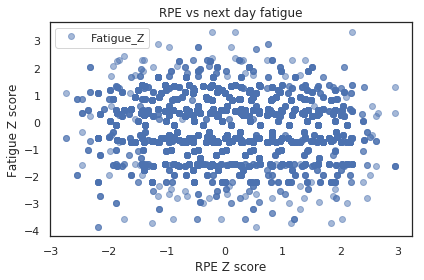

In [24]:
model = smf.ols('Fatigue_Z ~ RPE_Z', data=rpe)
res = model.fit()
plt.plot(rpe.RPE_Z, rpe.Fatigue_Z, 'o', alpha=.5)
decorate(title='RPE vs next day fatigue', xlabel='RPE Z score',
         ylabel='Fatigue Z score')
res.summary()
res.pvalues

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Soreness_Z   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     345.0
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           2.97e-75
Time:                        19:29:17   Log-Likelihood:                -9703.3
No. Observations:                7163   AIC:                         1.941e+04
Df Residuals:                    7161   BIC:                         1.942e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3283      0.011    -29.623      0.000      -0.350      -0.307
RPE_Z         -0.2060      0.011    -18.574      0.000      -0.228      -0.184
==============================================================================
Omnibus:                       28.779   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.074
Skew:                          -0.156   Prob(JB):                     4.86e-07
Kurtosis:                       2.993   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

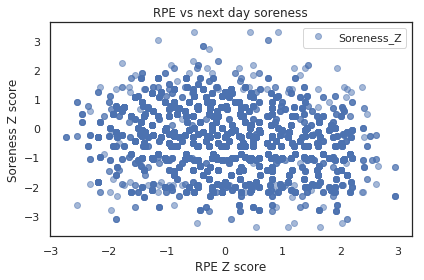

In [25]:
model = smf.ols('Soreness_Z ~ RPE_Z', data=rpe)
plt.plot(rpe.RPE_Z, rpe.Soreness_Z, 'o', alpha=.5)
decorate(title='RPE vs next day soreness', xlabel='RPE Z score',
         ylabel='Soreness Z score')
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Irritability_Z   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.678
Date:                Wed, 10 Apr 2019   Prob (F-statistic):              0.195
Time:                        19:29:18   Log-Likelihood:                -9702.5
No. Observations:                7163   AIC:                         1.941e+04
Df Residuals:                    7161   BIC:                         1.942e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0318      0.011     -2.867      0.004      -0.053      -0.010
RPE_Z         -0.0144      0.011     -1.295      0.195      -0.036       0.007
==============================================================================
Omnibus:                     2504.715   Durbin-Watson:                   0.776
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           141201.143
Skew:                          -0.874   Prob(JB):                         0.00
Kurtosis:                      24.681   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

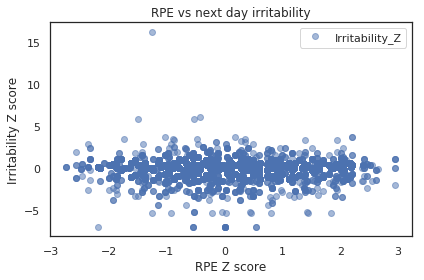

In [26]:
model = smf.ols('Irritability_Z ~ RPE_Z', data=rpe)
plt.plot(rpe.RPE_Z, rpe.Irritability_Z, 'o', alpha=.5)
decorate(title='RPE vs next day irritability', xlabel='RPE Z score',
         ylabel='Irritability Z score')
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Desire_Z   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     25.49
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           4.56e-07
Time:                        19:29:18   Log-Likelihood:                -10021.
No. Observations:                7163   AIC:                         2.005e+04
Df Residuals:                    7161   BIC:                         2.006e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0069      0.012     -0.600      0.549      -0.030       0.016
RPE_Z         -0.0585      0.012     -5.049      0.000      -0.081      -0.036
==============================================================================
Omnibus:                      979.914   Durbin-Watson:                   0.650
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13420.956
Skew:                           0.019   Prob(JB):                         0.00
Kurtosis:                       9.706   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

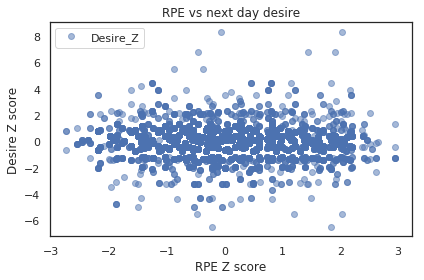

In [27]:
model = smf.ols('Desire_Z ~ RPE_Z', data=rpe)
plt.plot(rpe.RPE_Z, rpe.Desire_Z, 'o', alpha=.5)
decorate(title='RPE vs next day desire', xlabel='RPE Z score',
         ylabel='Desire Z score')
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         SleepQuality_Z   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4611
Date:                Wed, 10 Apr 2019   Prob (F-statistic):              0.497
Time:                        19:29:18   Log-Likelihood:                -9838.3
No. Observations:                7163   AIC:                         1.968e+04
Df Residuals:                    7161   BIC:                         1.969e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0043      0.011      0.380      0.704      -0.018       0.026
RPE_Z         -0.0077      0.011     -0.679      0.497      -0.030       0.014
==============================================================================
Omnibus:                      753.362   Durbin-Watson:                   0.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1701.190
Skew:                          -0.643   Prob(JB):                         0.00
Kurtosis:                       5.012   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

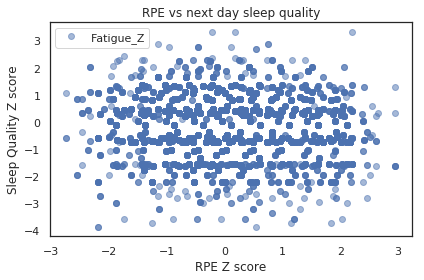

In [28]:
model = smf.ols('SleepQuality_Z ~ RPE_Z', data=rpe)
plt.plot(rpe.RPE_Z, rpe.Fatigue_Z, 'o', alpha=.5)
decorate(title='RPE vs next day sleep quality', xlabel='RPE Z score',
         ylabel='Sleep Quality Z score')
res = model.fit()
res.summary()